<a href="https://colab.research.google.com/github/jacobw59/PhysicsI_Labs/blob/main/phy122_N1L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 1

Jacob Williamson

3/24/2025

# Theory

## Importing Packages

This must be done by default with every program, the exact reasons are not important at this moment, feel free to copy-n-paste

In [1]:
import numpy as np
from numpy.linalg import norm
from numpy import array, sqrt, zeros, arange
import matplotlib.pyplot as plt

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

## The NumPy Array

In physics we use vectors, in python, these correspond to arrays: vectors $\rightarrow$ arrays.

Furthermore, collections of vectors may be concatenated to form 2-dimensional arrays.

Also the timeline is also a very long array, indicating all moments of time.

## Position

When we speak about position $\mathbf{x}$, we talk about an order pair, which may be thought



In [2]:
x  = array([1.0, 2.0, 3.0]) # m : position vector

x1 = array([3.12, 7.23, 2.23]) # m : position vector
x2 = array([9.12, 8.26, 2.87]) # m : position vector

## Displacement

Displacement is defined as the Change in Position, $\Delta \mathbf{x} = \mathbf{x}_1 - \mathbf{x}_2$.

In [3]:
Δx = x1 - x2 # m : displacement vector
print( Δx )

[-6.   -1.03 -0.64]


## Distance

Distance is defined as the norm of the position or displacement vectors, i.e. $\text{distance} = |\mathbf{x}| = |\Delta \mathbf{x}| $

In [4]:
print( norm(Δx), norm(x), norm(x1), norm(x2)  )# m : distances (for the position vectors defined earlier)

print( np.sqrt( np.sum( Δx**2 ) ), np.sqrt( sum( x**2 ) ), sqrt( sum( x1**2 ) ), sqrt( sum( x2**2 ) ) ) # m : distances (another way to define)

6.1213152181536925 3.7416573867739413 8.184143205003197 12.63482884727767
6.1213152181536925 3.7416573867739413 8.184143205003197 12.63482884727767


## Velocity

In [5]:
v  = array([4.0, 5.0, 6.0]) # m/s : velocity vector

v1 = array([4.12, 7.43, 2.63]) # m/s : velocity vector
v2 = array([8.72, 2.29, 9.87]) # m/s : velocity vector

## Speed

Like distance, speed is a scalar quantity, indicating the length of the velocity vector: $v = | \mathbf{v} |$.

In [6]:
print( norm(v), norm(v1), norm(v2)  ) # m/s : speeds (for the velocity vectors defined earlier)
print( np.sqrt( np.sum( v**2 ) ), np.sqrt( sum( v1**2 ) ), sqrt( sum( v2**2 ) ) ) # m/s : speeds (another way to define)

8.774964387392123 8.893604443643758 13.367849490475272
8.774964387392123 8.893604443643758 13.367849490475272


## Time Array

In our universe we must specifiy the increments of time.

In [7]:
dt = 0.5  ## s (detector time resolution)
t0 = 0    ## s (initial experiment time)
tf = 10.  ## s (final   experiment time)

T  = arange(t0, tf, dt)

print(T)
print("we have " + str(len(T)) + " time points")

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
we have 20 time points


## Trajectory

A trajectory is a collection of vectors. It is a 2-dimensional array, characterized for each moment in time and 3-Cartesian coordinates (x,y,z).

For us, it is initially set to a zero array, it is then progressively filled in.

In [8]:
Z = zeros( (len(T), 3) ) ## 3 for Cartesian coordinates, len(T) for number of time-points

## Now the for-loop, lets fill in the Zeros array above

Here we fill in the Z array with [1,2,3] for along

In [9]:
for t in range(len(T)):
    Z[t] = array([1,2,3]) ## [t] tell the program to fill in the given index, t

print(Z)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


#   Experiment/Simulation

#### Before we start lets define the times in which all our experiments will take place.

####  Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array.

In [ ]:
Δt = 0.01 ### s(detector)
t0 = 0
tf = 10

dt       = Δt
timeline = arange(t0, tf, Δt)

##   <font color='Red'> **Experiment 1** </font>

###  To begin lets start with by defining an initial position.

In [ ]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array

### PRINT the distance of the previously defined position vector (give units!)

In [ ]:
distance = norm(x_0)

print("the initial distance is %4.3f meters "  % distance)

the initial distance is 1.000 meters 


### Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t.

In [ ]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
for t in range(1,len(timeline)):
    x_t[t] = x_t[t-1] + v_t[t-1] * Δt ## numerically integrate the velocity
    v_t[t] = v_t[t-1] ## set new velocity = old velocity (because constant velocity)

### Take a time-derivative of x_t to obtain dxdt_t.

In [ ]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory

### Make 2 plots of with: x_t and \{v_t, dxdt_t\} in matplotlib, both as a function of time. Make sure to include all LABELS!.

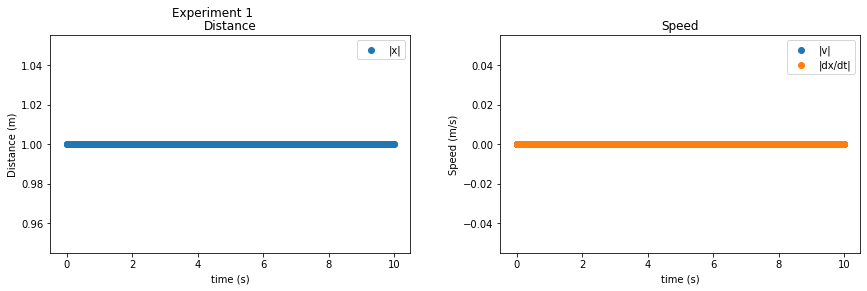

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distance (m)")

ax2.scatter(timeline, norm(v_t, axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")
fig.show()

##   <font color='Red'> **Experiment 2** </font>

### <font color='Red'> To begin lets start with by defining an initial position and velocity </font>

In [ ]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array
v_0 = array([1., 0., 0.]) ## m/s : initial velocity vector/array

### <font color='Red'> PRINT out the distance and speed of the previously defined position and velocity vectors: </font>

In [ ]:
distance = norm(x_0)
speed    = norm(v_0)

print("the initial distance is %4.3f meters "  % distance )
print("the initial speed    is %4.3f meters/second "  % speed )

the initial distance is 1.000 meters 
the initial speed    is 1.000 meters/second 


### <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t. </font>

In [ ]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt ## numerically integrate the velocity
  v_t[t] = v_t[t-1] ## set new velocity = old velocity (because constant velocity)

### <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

### <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>



In [ ]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory

### <font color='Red'> Calculate the Average Velocity over time, v_t. </font>

In [ ]:
np.sum(v_t, axis=0)/(len(v_t))

array([1., 0., 0.])

### <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and dvdt_t in matplotlib, both as a function of time. Make sure to include all LABELS!. </font>

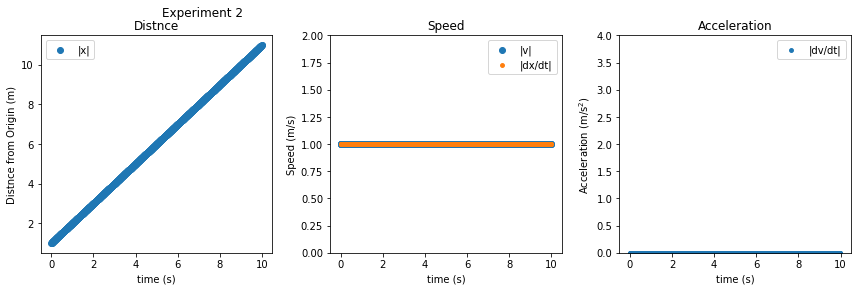

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment 2")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distnce")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce from Origin (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.set_ylim([0, 2])
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 4])
ax3.set_title("Acceleration")
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")
ax3.legend()
fig.show()

##   <font color='Red'> **Experiment 3** </font>

###  <font color='Red'> To begin lets start with by defining an initial position, velocity, and acceleration </font>

In [ ]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array
v_0 = array([1., 0., 0.]) ## m/s : initial velocity vector/array
a_0 = array([2., 0., 0.]) ## m/s/s : initial acceleration vector/array

###  <font color='Red'> PRINT out the distance, speed, and magnitude of the acceleration of the previously defined vectors: </font>

In [ ]:
distance     = norm(x_0)
speed        = norm(v_0)
acceleration = norm(a_0)

print("the initial distance     is %4.3f meters "  % distance)
print("the initial speed        is %4.3f meters/second "  % speed)
print("the initial acceleration is %4.3f meters/second/second "  % acceleration)

the initial distance     is 1.000 meters 
the initial speed        is 1.000 meters/second 
the initial acceleration is 2.000 meters/second/second 


###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(timeline), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = a_0 ## initialize the 0th acceleration-trajectory entry to the initial-acceleration
for t in range(1,len(x_t)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = a_t[t-1] ## Velocity-Verlet Step 2 : find new acceleraiton from old acceleraiton
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

###  <font color='Red'> Take a time-derivative of a_t to obtain dadt_t. </font>

In [ ]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory
dadt_t = d(a_t)/dt ## take numerical-derivative of the aforementioned acceleration-trajectory

###  <font color='Red'> Make 4 plots of with: x_t, \{v_t, dxdt_t\}, \{ a_t, dvdt_t\}, and dadt_t in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

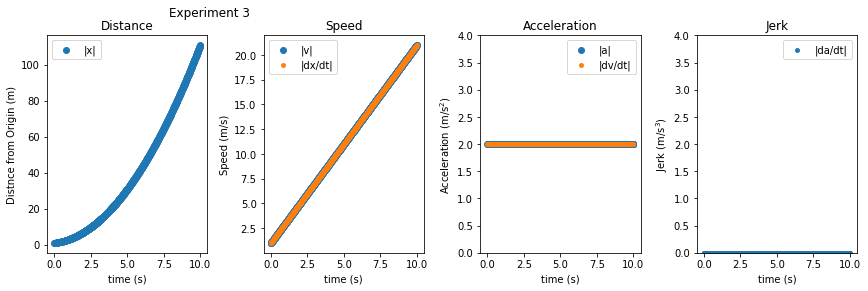

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Experiment 3")
fig.subplots_adjust(hspace=0.01, wspace=0.35, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce from Origin (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 4])
ax3.set_title("Acceleration")
ax3.legend()
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")

ax4.scatter(timeline, norm(dadt_t, axis=1), s=15, label="|da/dt|")
ax4.set_ylim([0, 4])
ax4.set_title("Jerk")
ax4.set(xlabel="time (s)", ylabel="Jerk (m/s$^3$)")
ax4.legend()
fig.show()

##   <font color='Red'> **Experiment 4** </font>

###   <font color='Red'> To begin lets start given the following initial position, velocity, and acceleration, WITH velocity and acceleration in different directions! </font>

In [ ]:
x_0 = array([10., 0., 0.]) ## m : initial position vector/array
v_0 = array([50., 0., 0.]) ## m/s : initial velocity vector/array
a_0 = array([-9.81, 0., 0.]) ## m/s/s : initial acceleration vector/array

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(timeline), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = a_0 ## initialize the 0th acceleration-trajectory entry to the initial-acceleration
for t in range(1,len(x_t)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = a_t[t-1] ## Velocity-Verlet Step 2 : find new acceleraiton from old acceleraiton
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

###  <font color='Red'> Take a time-derivative of a_t to obtain dadt_t. </font>

In [ ]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory
dadt_t = d(a_t)/dt ## take numerical-derivative of the aforementioned acceleration-trajectory

###  <font color='Red'> Make 4 plots of with: x_t, \{v_t, dxdt_t\}, \{ a_t, dvdt_t\}, and dadt_t in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

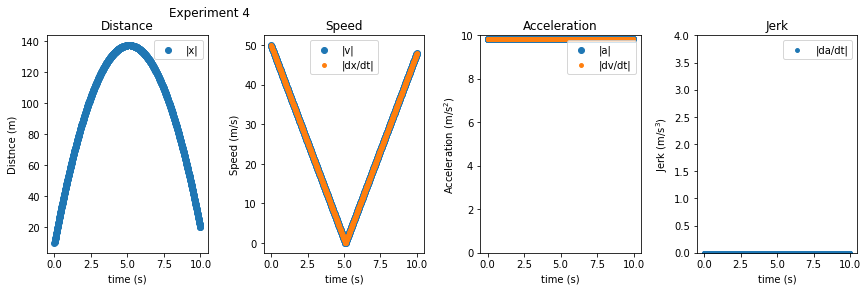

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Experiment 4")
fig.subplots_adjust(hspace=0.05, wspace=0.35, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 10])
ax3.set_title("Acceleration")
ax3.legend()
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")

ax4.scatter(timeline, norm(dadt_t, axis=1), s=15, label="|da/dt|")
ax4.set_ylim([0, 4])
ax4.set_title("Jerk")
ax4.legend()
ax4.set(xlabel="time (s)", ylabel="Jerk (m/s$^3$)")
ax4.legend()
fig.show()

#   <font color='Red'> **Conclusion** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

In the lab, we studied motion under constant acceleration using free fall with gravity. Using Python to model the motion allowed us to keep track of the position and velocity through time of a falling body's center of mass. The results we obtained reiterated the fact that at about the surface of the Earth, the acceleration is constant at 9.81 m/s² causing a linear increase in velocity and a quadratic increase in displacement with time, as anticipated by theory and basic kinematic equations. The experiment enhanced our understanding of gravity-based motion and how computational tools could be used to effectively simulate the phenomena.